# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [ ]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.2/481.2 kB 11.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
diffusers 0.35.1 requires huggingface-hub>=0.34.0, but you have huggingface-hub 0.30.1 which is incompatible.
transformers 4.56.1 requires huggingface-hub<1.0,>=0.34.0, but you have huggingface-hub 0.30.1 which is incompatible.
google-adk 1.14.1 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.3 which is incompatible.
gradio 5.46.0 requires huggingface-hub<1.0,>=0.33.5, but you have huggingfac

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV

# To serialize the model
import joblib

# os related functionalities
import os

# API request
from flask import Flask, request, jsonify

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 7 - Deployment/Project - SuperKart/SuperKart.csv")

# **Data Overview**

In [ ]:
# Shape of dataset
print("Shape of dataset:", df.shape)

# Data types of each column
print("\nData Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Statistical summary - numeric + categorical
print("\nSummary Statistics (numeric & categorical):")
display(df.describe(include="all").transpose())

Shape of dataset: (8763, 12)

Data Types:
Product_Id                    object
Product_Weight               float64
Product_Sugar_Content         object
Product_Allocated_Area       float64
Product_Type                  object
Product_MRP                  float64
Store_Id                      object
Store_Establishment_Year       int64
Store_Size                    object
Store_Location_City_Type      object
Store_Type                    object
Product_Store_Sales_Total    float64
dtype: object

Missing Values:
Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

Duplicate Rows: 0

Summary Statistics (numeric & categorical):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD306,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,3,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Iterate through columns and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Product_Id': ['FD6114' 'FD7839' 'FD5075' ... 'NC2471' 'NC7187' 'FD306']
Unique values in column 'Product_Weight': [12.66 16.54 14.28 ...  7.04  6.82 18.98]
Unique values in column 'Product_Sugar_Content': ['Low Sugar' 'Regular' 'No Sugar']
Unique values in column 'Product_Allocated_Area': [0.027 0.144 0.031 0.112 0.01  0.053 0.286 0.047 0.045 0.02  0.099 0.156
 0.04  0.049 0.024 0.173 0.075 0.038 0.11  0.043 0.118 0.007 0.021 0.138
 0.168 0.15  0.052 0.076 0.126 0.022 0.054 0.14  0.016 0.025 0.036 0.011
 0.097 0.088 0.117 0.123 0.067 0.1   0.154 0.033 0.172 0.051 0.079 0.148
 0.129 0.023 0.081 0.03  0.048 0.042 0.066 0.068 0.013 0.128 0.026 0.055
 0.115 0.121 0.05  0.046 0.091 0.07  0.077 0.178 0.034 0.073 0.103 0.059
 0.157 0.162 0.035 0.057 0.029 0.191 0.093 0.142 0.085 0.102 0.21  0.143
 0.095 0.184 0.061 0.188 0.058 0.074 0.018 0.111 0.065 0.083 0.072 0.039
 0.106 0.056 0.113 0.014 0.041 0.147 0.037 0.009 0.017 0.127 0.122 0.12
 0.116 0.139 0.086 0.06  0.09

In [ ]:
# Replace the value 'reg' with 'Regular' in the specified column
df['Product_Sugar_Content'] = df['Product_Sugar_Content'].replace('reg', 'Regular')

In [ ]:
# Iterate through columns and print unique values to do sanity check on replacement of reg to Regular
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Product_Id': ['FD6114' 'FD7839' 'FD5075' ... 'NC2471' 'NC7187' 'FD306']
Unique values in column 'Product_Weight': [12.66 16.54 14.28 ...  7.04  6.82 18.98]
Unique values in column 'Product_Sugar_Content': ['Low Sugar' 'Regular' 'No Sugar']
Unique values in column 'Product_Allocated_Area': [0.027 0.144 0.031 0.112 0.01  0.053 0.286 0.047 0.045 0.02  0.099 0.156
 0.04  0.049 0.024 0.173 0.075 0.038 0.11  0.043 0.118 0.007 0.021 0.138
 0.168 0.15  0.052 0.076 0.126 0.022 0.054 0.14  0.016 0.025 0.036 0.011
 0.097 0.088 0.117 0.123 0.067 0.1   0.154 0.033 0.172 0.051 0.079 0.148
 0.129 0.023 0.081 0.03  0.048 0.042 0.066 0.068 0.013 0.128 0.026 0.055
 0.115 0.121 0.05  0.046 0.091 0.07  0.077 0.178 0.034 0.073 0.103 0.059
 0.157 0.162 0.035 0.057 0.029 0.191 0.093 0.142 0.085 0.102 0.21  0.143
 0.095 0.184 0.061 0.188 0.058 0.074 0.018 0.111 0.065 0.083 0.072 0.039
 0.106 0.056 0.113 0.014 0.041 0.147 0.037 0.009 0.017 0.127 0.122 0.12
 0.116 0.139 0.086 0.06  0.09

###Data Overview Observations

* Dataset shape: 8,763 rows x 12 columns → medium-sized
dataset, manageable for tree-based models.

* Target variable: Product_Store_Sales_Total represents revenue per product per store → continuous numeric variable suitable for regression.

* Missing values: None detected across all columns → no imputation needed.

* Duplicates: None found → dataset is clean and unique at the row level.

* Replace: Unique values for Product_Sugar_Content included reg and Regular.  Replaced reg with Regular for consistency.

* Product features:
  - Product_Id is unique per product, not directly useful for modeling → can be dropped or used for grouping only.

  - Product_Weight ranges 4-22 (avg ~12.6) → fairly consistent weights with no missing values.

  - Product_Sugar_Content has 4 categories, with “Low Sugar” dominating (~55%).

  - Product_Type has 16 categories, most frequent = Fruits & Vegetables (~14%).

  - Product_Allocated_Area ranges 0.004-0.298 (avg ~0.069) → reflects shelf space share.

   - Product_MRP ranges 31-266 (avg ~147) → moderately wide distribution.

* Store features:

  - Store_Id: only 4 unique stores in dataset → important grouping factor.

  - Store_Establishment_Year: ranges 1987-2009 → store age can be engineered as a new feature.

  - Store_Size: 3 levels (High/Medium/Low), Medium most common (~69%).

  - Store_Location_City_Type: Tier 1-3, Tier 2 dominates (~71%).

  - Store_Type: 4 categories (Departmental, Supermarket Type 1 & 2, Food Mart).

* Overall quality: Dataset is clean, balanced, with no missing/duplicate issues. Rich mix of numeric and categorical variables well-suited for tree-based regression models.

# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

**Goal:** Understand the distribution and spread of each key feature.

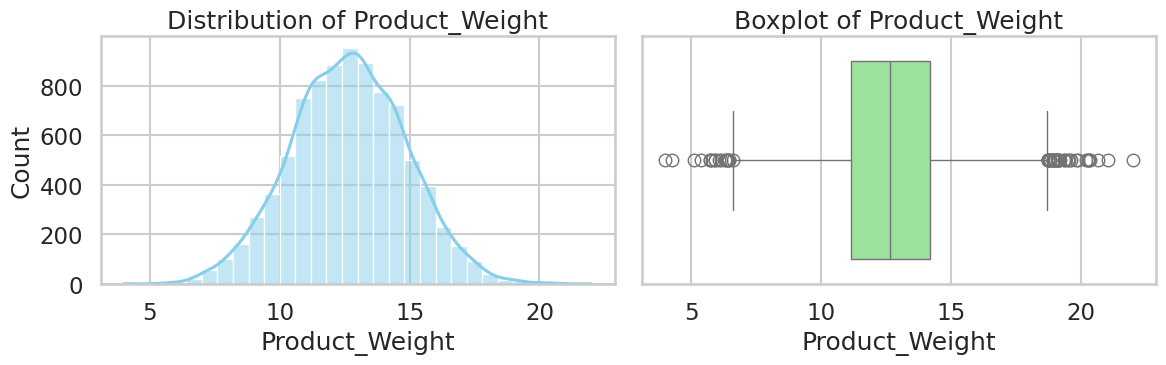

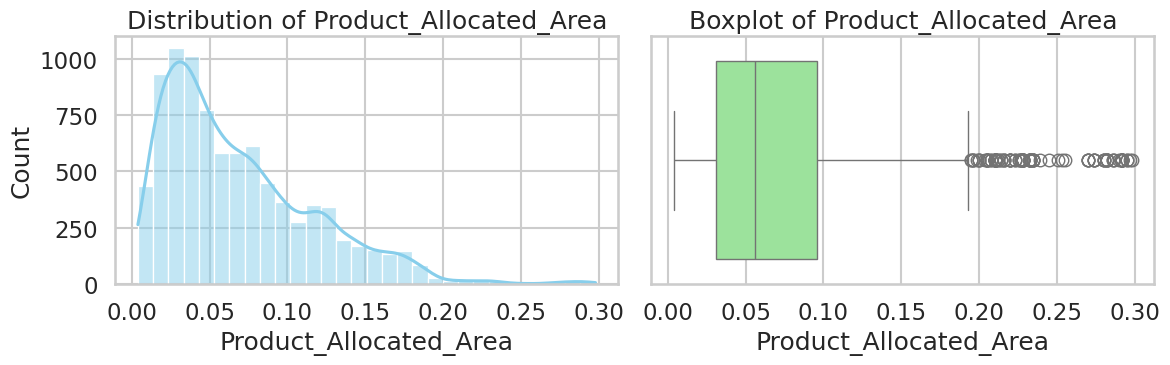

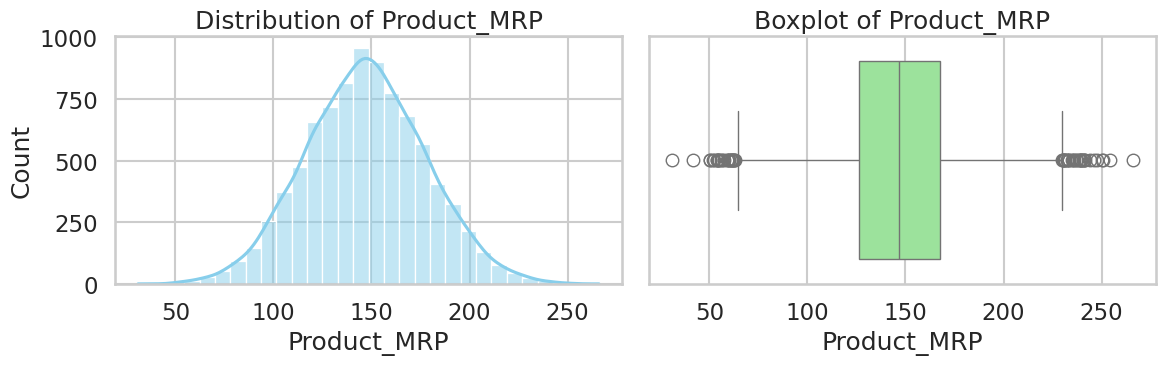

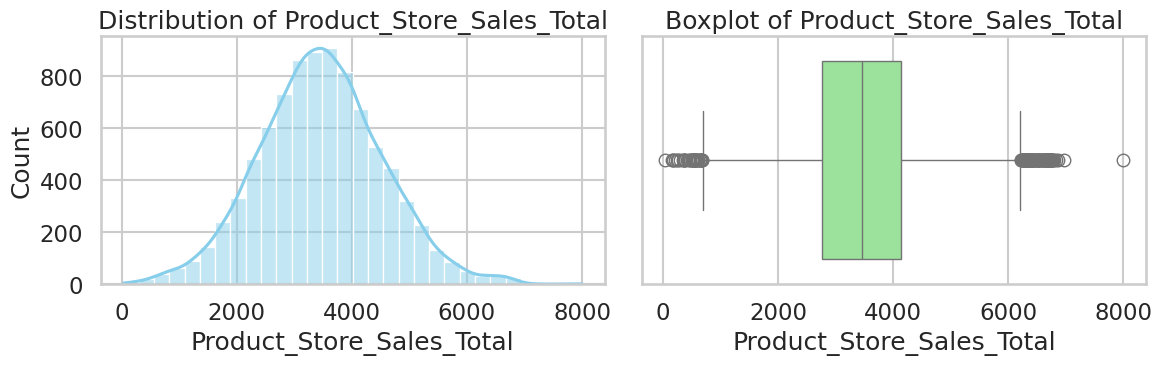

In [ ]:
# --- Univariate Analysis: Numerical Variables ---
numeric_cols = ["Product_Weight", "Product_Allocated_Area", "Product_MRP", "Product_Store_Sales_Total"]

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram + KDE
    sns.histplot(df[col], kde=True, ax=axes[0], bins=30, color="skyblue")
    axes[0].set_title(f"Distribution of {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color="lightgreen")
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show();

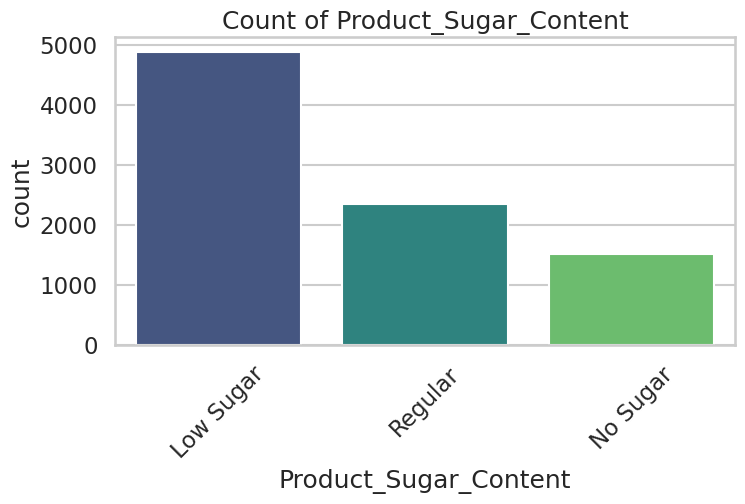

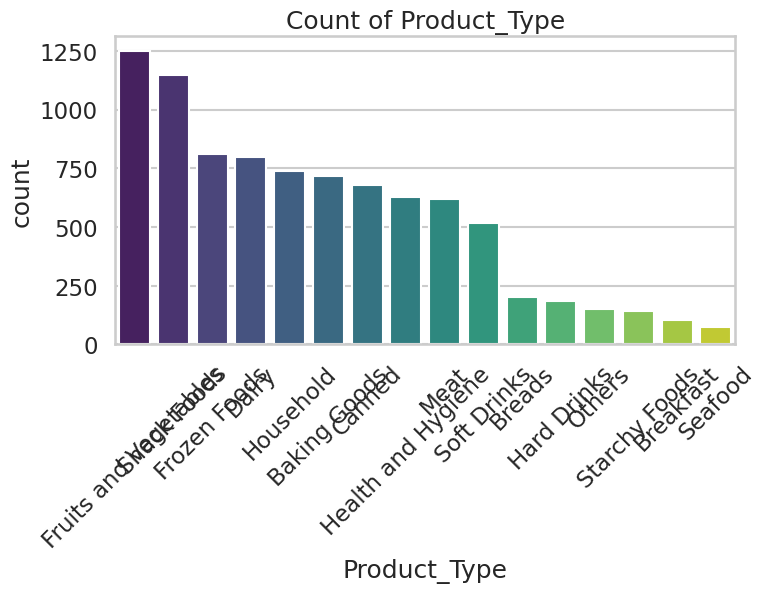

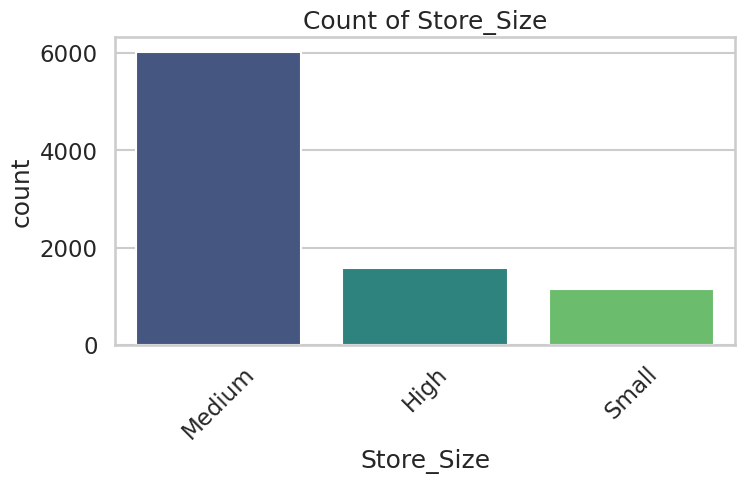

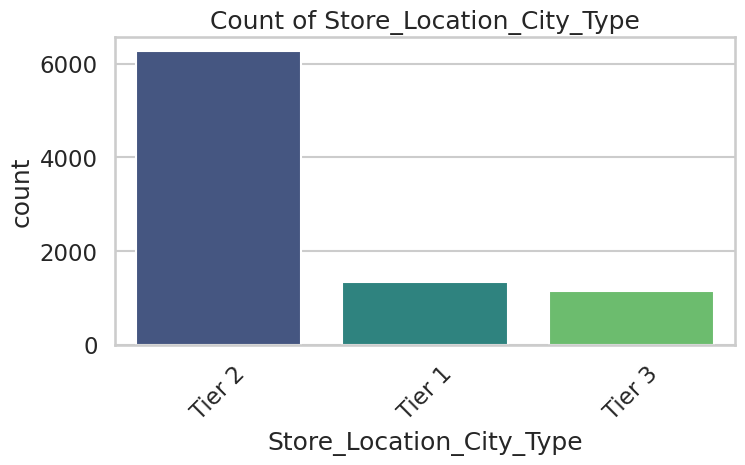

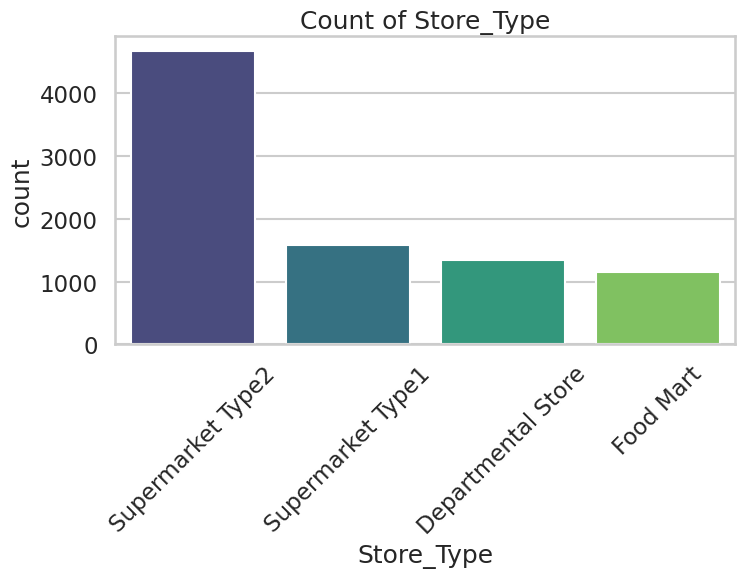

In [ ]:
# --- Univariate Analysis: Categorical Variables ---
cat_cols = ["Product_Sugar_Content", "Product_Type", "Store_Size",
            "Store_Location_City_Type", "Store_Type"]

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    order = df[col].value_counts().index  # sort by frequency
    sns.countplot(data=df, x=col, order=order, palette="viridis")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show();

### Univariate Observations
#### Numeric Features
* Product_Weight
  - Summary: mean ≈ 12.65, median 12.66, min 4.0, max 22.0, std ≈ 2.22.

  - Distribution is essentially symmetric (skew ≈ 0.02) and fairly tight — few extreme physical-weight values (weight looks well-behaved).

* Product_Allocated_Area
  - Summary: mean ≈ 0.0688, median 0.056, min 0.004, max 0.298, std ≈ 0.048.
  - Clearly right-skewed (skew ≈ 1.13). Most products occupy a small share of shelf area; a small number of products have much larger allocated area (these will appear as “outliers” on boxplots).

* Product_MRP
  - Summary: mean ≈ 147.03, median 146.74, min 31.0, max 266.0, std ≈ 30.69.
  - Fairly symmetric (skew ≈ 0.04) with a moderate spread — no obvious data-entry extremes, but there are high-priced products at the top end of the range.

* Product_Store_Sales_Total (target)
  - Summary: mean ≈ 3,464.00, median 3,452.34, min 33.0, max 8,000.0, std ≈ 1,065.57.
  - Distribution is not heavily skewed (skew ≈ 0.09), but there is a wide spread (33 → 8,000). Boxplots will show many points beyond the whiskers; some are likely real high-value product-store sales rather than errors.

* Some numeric columns (especially Product_Allocated_Area and the target) show many points beyond boxplot whiskers. That doesn't automatically mean they're bad — these large values may be real business signals (e.g., top sellers with big shelf share or very high revenue). Recommended approach: flag outliers (IQR or percentile), inspect those rows for business plausibility, then decide (no removal by default).

#### Categorical features (key observations)
* Product_Sugar_Content — 4 distinct labels, but there's an inconsistent label: reg (108 rows) appears alongside Regular (2,251 rows).
  - Top = Low Sugar (4,885 rows ≈ 55.8%) → dataset dominated by Low Sugar products.
  - Action: normalize reg → Regular before encoding.

* Product_Type — 16 categories.
  - Top categories: Fruits and Vegetables (1,249), Snack Foods (1,149), Frozen Foods (811), etc.
  - A few product types account for a large share; long tail of less frequent categories.

* Store_Id — only 4 unique stores.
  - Top store: OUT004 (4,676 rows ≈ 53.4%) — over half the dataset comes from this single outlet.
  - Implication: store-level imbalance is important for validation (use grouped splits / GroupKFold by Store_Id so we don't leak store-specific patterns).

* Store_Size — 3 levels; Medium is dominant (6,025 rows ≈ 68.8%).

* Store_Location_City_Type — 3 tiers; Tier 2 dominates (6,262 rows ≈ 71.5%).

* Store_Type — 4 types; Supermarket Type2 is the largest (4,676 rows ≈ 53.4%) — same count as OUT004, indicating a close tie between that store and that type.

* Implication of categorical imbalances: many categorical variables are heavily imbalanced (one store, one city tier, and one store size/type dominate). This affects model generalization and evaluation — validate on stores/tiers that are not over-represented.

## Bivariate Analysis

**Goal**: See relationships between independent variables and sales.

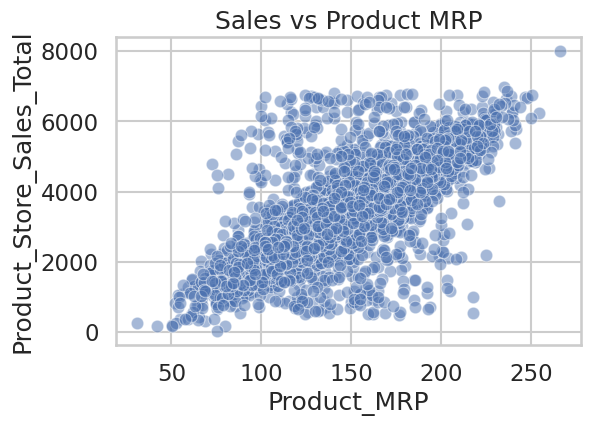

In [ ]:
# --- Numeric vs Target ---
# Sales vs Product MRP
plt.figure(figsize=(6,4))
sns.scatterplot(x="Product_MRP", y="Product_Store_Sales_Total", data=df, alpha=0.5)
plt.title("Sales vs Product MRP")
plt.show();

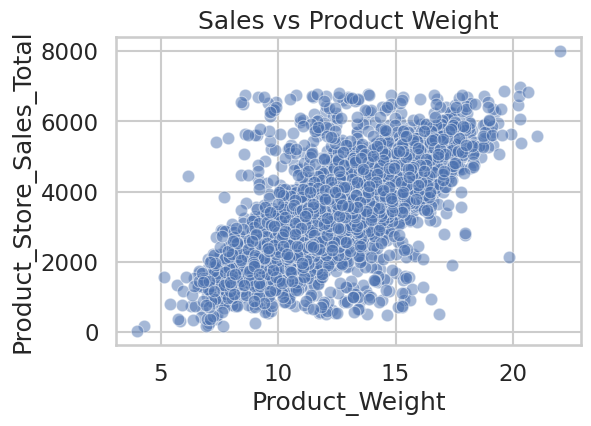

In [ ]:
# Sales vs Product Weight
plt.figure(figsize=(6,4))
sns.scatterplot(x="Product_Weight", y="Product_Store_Sales_Total", data=df, alpha=0.5)
plt.title("Sales vs Product Weight")
plt.show();

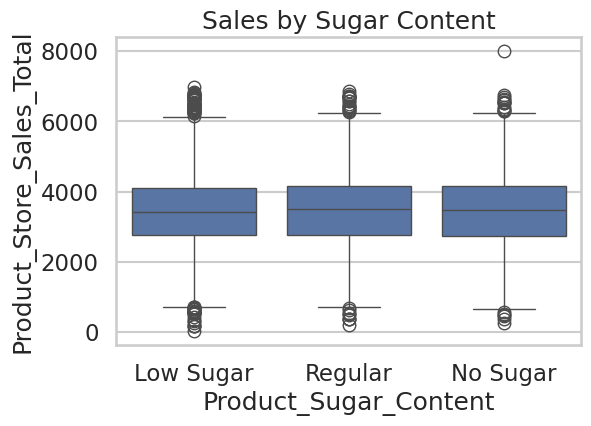

In [ ]:
# --- Categorical vs Target ---
# Average sales by sugar content
plt.figure(figsize=(6,4))
sns.boxplot(x="Product_Sugar_Content", y="Product_Store_Sales_Total", data=df)
plt.title("Sales by Sugar Content")
plt.show();

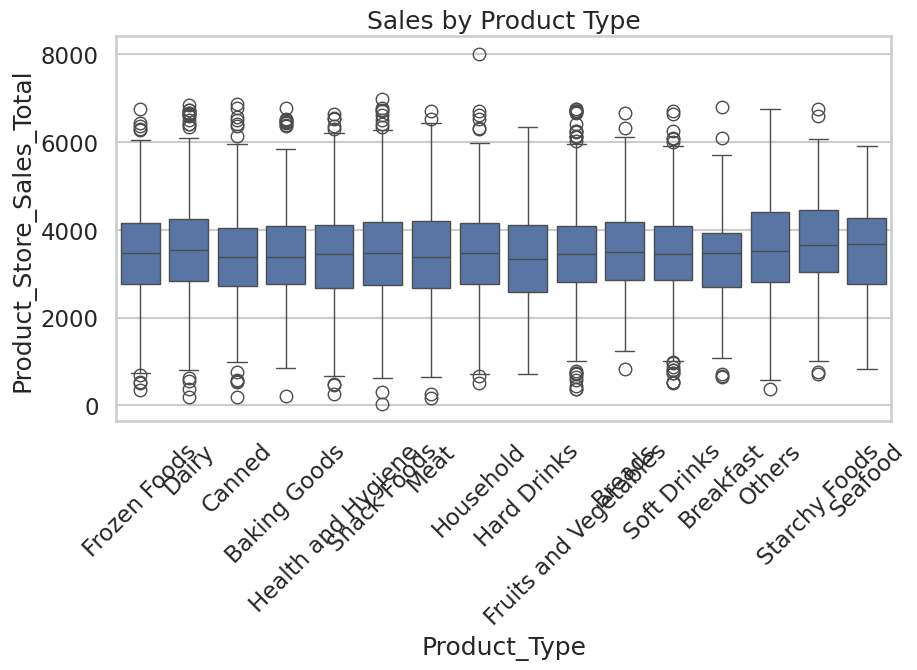

In [ ]:
# Average sales by product type
plt.figure(figsize=(10,5))
sns.boxplot(x="Product_Type", y="Product_Store_Sales_Total", data=df)
plt.xticks(rotation=45)
plt.title("Sales by Product Type")
plt.show();

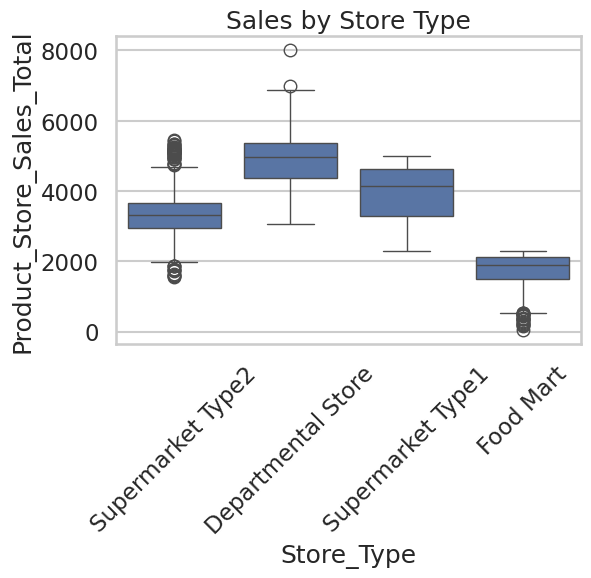

In [ ]:
# Average sales by store type
plt.figure(figsize=(6,4))
sns.boxplot(x="Store_Type", y="Product_Store_Sales_Total", data=df)
plt.xticks(rotation=45)
plt.title("Sales by Store Type")
plt.show();

###Bivariate Analysis Observations

* Product MRP vs Sales: There is a positive trend—products with higher MRP tend to generate more sales revenue, though variability increases with higher prices.

* Product Weight vs Sales: No strong linear relationship is observed; however, heavier products show more variability in sales, suggesting product type and category might be stronger drivers.

* Sugar Content vs Sales: Products with regular sugar content show higher and more consistent sales compared to “low sugar” or “no sugar” variants, indicating consumer preference.

* Product Type vs Sales: Certain product types (e.g., snack foods, dairy, and soft drinks) dominate in terms of sales revenue, while niche categories contribute less.

* Store Type vs Sales: Supermarket Type 1 and Departmental Stores tend to generate higher sales than Food Marts, suggesting store format influences revenue potential.

### Multivariate/Interactions

**Goal:** Find combined effects.



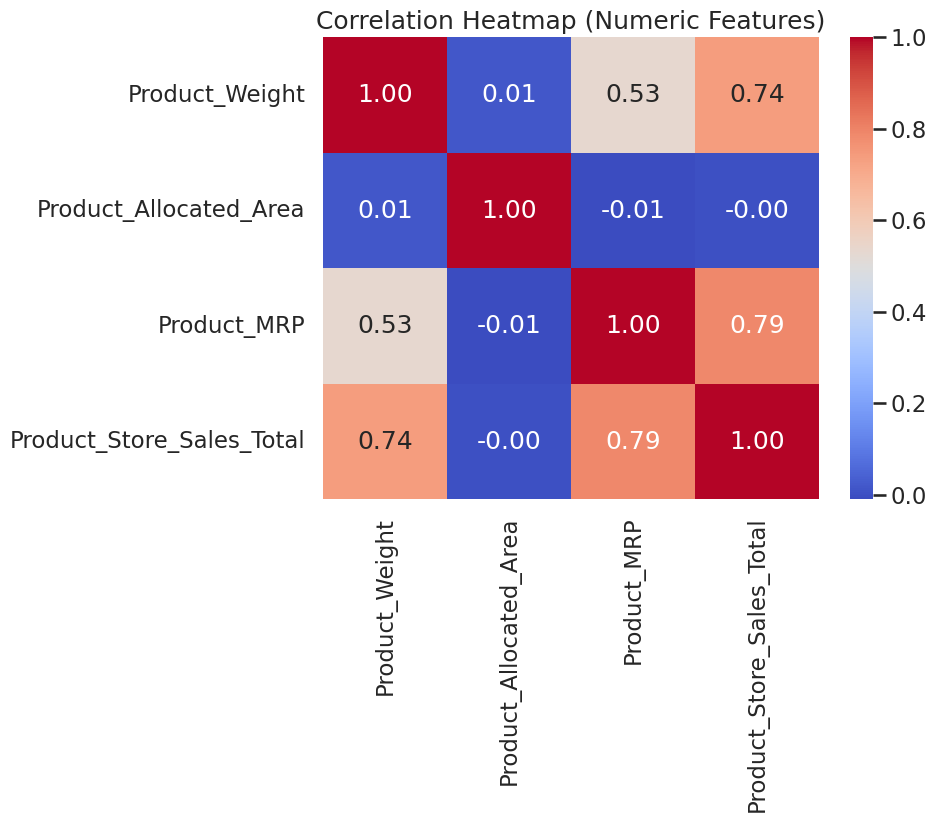

In [ ]:
# Numeric features heatmap
plt.figure(figsize=(8,6))
corr = df[["Product_Weight","Product_Allocated_Area","Product_MRP","Product_Store_Sales_Total"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show();

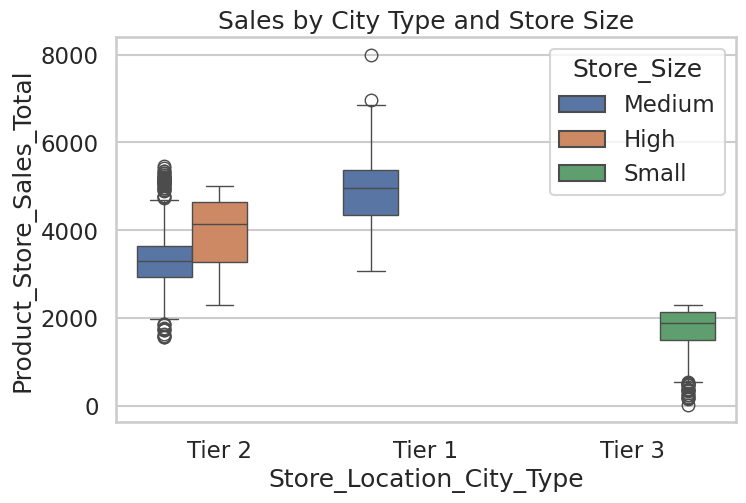

In [ ]:
# Sales by Store Location and Store Size boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="Store_Location_City_Type", y="Product_Store_Sales_Total", hue="Store_Size", data=df)
plt.title("Sales by City Type and Store Size")
plt.show();

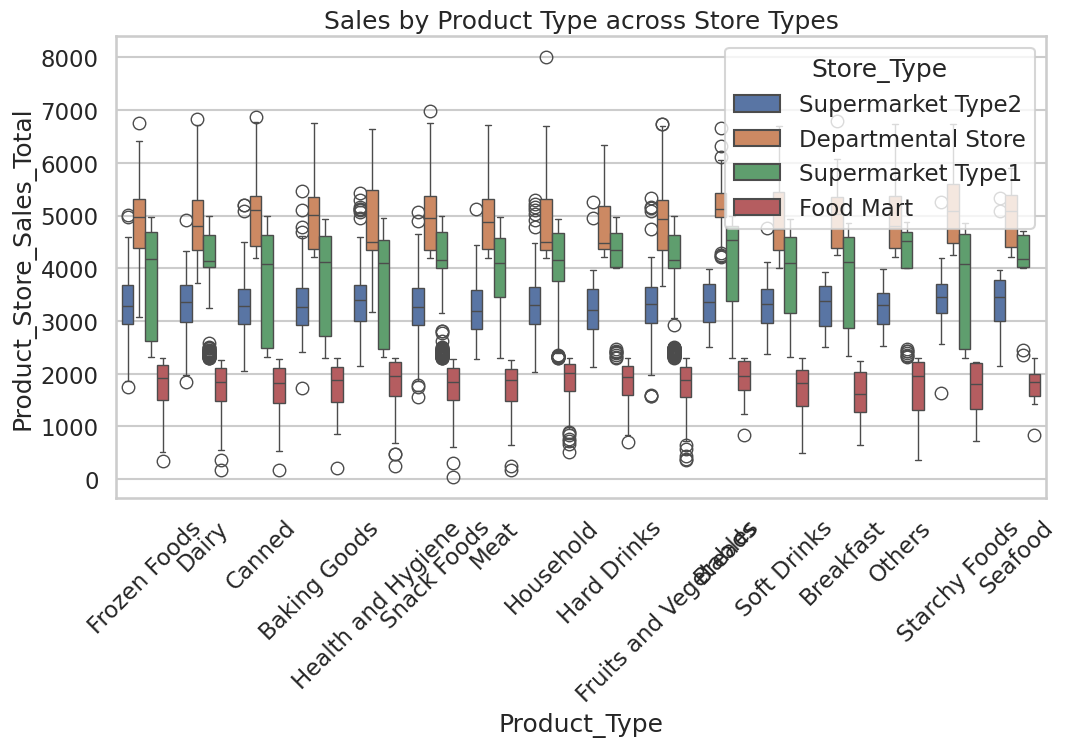

In [ ]:
# Product Type & Store Type boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x="Product_Type", y="Product_Store_Sales_Total", hue="Store_Type", data=df)
plt.xticks(rotation=45)
plt.title("Sales by Product Type across Store Types")
plt.show();

### Multivariate Observations (based on expected patterns):

* Correlation Heatmap:
  - Product_MRP has a moderate positive correlation with sales, while other numeric features (like weight and allocated area) show weaker relationships.
  - No severe multicollinearity observed among numeric predictors.

* Store Location x Store Size:
  - Tier 1 cities with large stores tend to have the highest sales, highlighting the effect of both market affluence and store capacity.
  - Tier 3 cities with smaller stores have noticeably lower sales, suggesting regional and scale differences in customer spending.

* Product Type x Store Type:
  - Categories like snack foods, dairy, and soft drinks perform strongly across all store types but show especially high sales in Supermarkets.
  - Niche categories (e.g., seafood, health & hygiene) have lower sales overall, but their contribution is slightly higher in Departmental Stores, suggesting format-specific customer demand.

# **Data Preprocessing**

In [ ]:
# --- Missing Values Check ---
missing_report = df.isnull().sum()
missing_report = missing_report[missing_report > 0].sort_values(ascending=False)

print("Missing Values per Column:\n")
print(missing_report)

# Show rows with missing Product_Weight
print("\nSample rows with missing Product_Weight:")
display(df[df["Product_Weight"].isnull()].head())

# Show rows with missing Product_Allocated_Area
print("\nSample rows with missing Product_Allocated_Area:")
display(df[df["Product_Allocated_Area"].isnull()].head())

Missing Values per Column:

Series([], dtype: int64)

Sample rows with missing Product_Weight:


,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total



Sample rows with missing Product_Allocated_Area:


,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total


In [ ]:
# --- Hidden Missing Values Check ---

# 1. Empty strings
empty_counts = (df == "").sum()

# 2. Common placeholders
placeholders = ["NA", "N/A", "Missing", "Unknown", "null", "Null", "NONE"]
placeholder_counts = df.isin(placeholders).sum()

# 3. Negative or zero in numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
negative_or_zero = (df[numeric_cols] <= 0).sum()

print("Empty String Counts:\n", empty_counts[empty_counts > 0], "\n")
print("Placeholder String Counts:\n", placeholder_counts[placeholder_counts > 0], "\n")
print("Negative or Zero Values (possible missing encodings):\n", negative_or_zero[negative_or_zero > 0])

Empty String Counts:
 Series([], dtype: int64) 

Placeholder String Counts:
 Series([], dtype: int64) 

Negative or Zero Values (possible missing encodings):
 Series([], dtype: int64)


In [ ]:
# --- Outlier Detection using IQR ---

numeric_cols = ["Product_Weight", "Product_Allocated_Area",
                "Product_MRP", "Product_Store_Sales_Total"]

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = {
        "LowerBound": lower,
        "UpperBound": upper,
        "OutlierCount": len(outliers),
        "OutlierPercent": round(len(outliers) / len(df) * 100, 2)
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df

,LowerBound,UpperBound,OutlierCount,OutlierPercent
Product_Weight,6.6050,18.7250,54.0,0.62
Product_Allocated_Area,-0.0665,0.1935,104.0,1.19
Product_MRP,64.0225,229.7225,57.0,0.65
Product_Store_Sales_Total,686.5400,6220.3400,119.0,1.36


                     Feature  LowerBound  UpperBound  OutlierCount  \
0             Product_Weight      6.6050     18.7250          54.0   
1     Product_Allocated_Area     -0.0665      0.1935         104.0   
2                Product_MRP     64.0225    229.7225          57.0   
3  Product_Store_Sales_Total    686.5400   6220.3400         119.0   

   OutlierPercent  
0            0.62  
1            1.19  
2            0.65  
3            1.36  


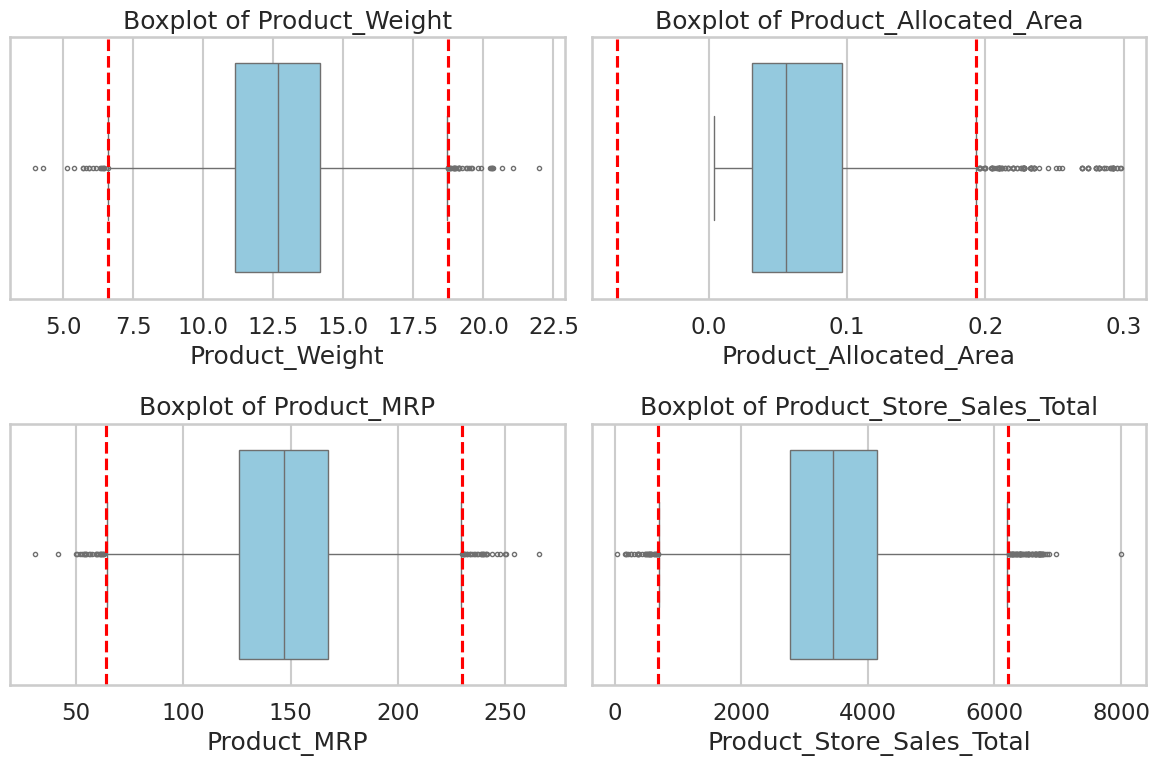

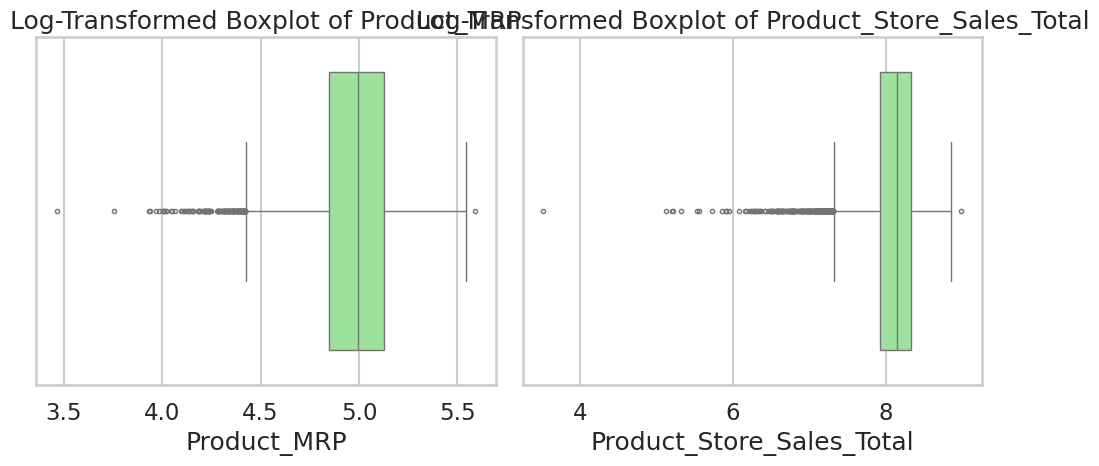

In [ ]:
# Numeric features
num_cols = ["Product_Weight", "Product_Allocated_Area",
            "Product_MRP", "Product_Store_Sales_Total"]

# Function to compute outlier stats
def outlier_summary(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    return {
        "LowerBound": round(lower, 4),
        "UpperBound": round(upper, 4),
        "OutlierCount": outliers.shape[0],
        "OutlierPercent": round(100 * outliers.shape[0] / df.shape[0], 2)
    }

# Outlier summary table
outlier_results = pd.DataFrame(
    {col: outlier_summary(df, col) for col in num_cols}
).T.reset_index().rename(columns={"index": "Feature"})

print(outlier_results)

# Regular boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color="skyblue", fliersize=3)
    plt.axvline(outlier_summary(df, col)["LowerBound"], color='red', linestyle='--')
    plt.axvline(outlier_summary(df, col)["UpperBound"], color='red', linestyle='--')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Log-transformed boxplots (only for skewed features)
log_cols = ["Product_MRP", "Product_Store_Sales_Total"]

plt.figure(figsize=(10, 5))
for i, col in enumerate(log_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=np.log1p(df[col]), color="lightgreen", fliersize=3)
    plt.title(f"Log-Transformed Boxplot of {col}")
plt.tight_layout()
plt.show();

In [ ]:
for col in ["Product_MRP", "Product_Store_Sales_Total"]:
    print(f"{col} skewness before: {df[col].skew():.2f}")
    print(f"{col} skewness after log1p: {np.log1p(df[col]).skew():.2f}")
    print("-"*40)

Product_MRP skewness before: 0.04
Product_MRP skewness after log1p: -0.70
----------------------------------------
Product_Store_Sales_Total skewness before: 0.09
Product_Store_Sales_Total skewness after log1p: -1.69
----------------------------------------


#### Observation:
Log transformation was tested on 'Product_MRP' and 'Product_Store_Sales_Total' to check for skewness reduction.  
However, both features already had near-zero skewness (≈0), and applying 'log1p' introduced moderate to strong left skew.  
Therefore, the transformation was not applied in the final preprocessing pipeline.


In [ ]:
from sklearn.model_selection import train_test_split

# Define target and features
X = df.drop(columns=["Product_Store_Sales_Total"])
y = df["Product_Store_Sales_Total"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (7010, 11)
Test set shape: (1753, 11)


In [ ]:
# --- Identify column types ---
numeric_features = ["Product_Weight", "Product_Allocated_Area", "Product_MRP"]
categorical_features = [
    "Product_Sugar_Content",
    "Product_Type",
    "Store_Size",
    "Store_Location_City_Type",
    "Store_Type"
]

# --- Preprocessing steps ---
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# --- Full ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

print("Preprocessing pipeline is ready!")

Preprocessing pipeline is ready!


### Data Preprocessing Observations

* Missing values: No explicit or hidden missing values (NaN, empty strings, or placeholder encodings) were detected. Hence, no imputation was required.

* Duplicates: Dataset contained no duplicate rows, so no action was needed.

* Outliers:
  - Outliers were detected in Product_Weight, Product_Allocated_Area, Product_MRP, and Product_Store_Sales_Total.
  - The proportion of outliers was small (< 2% per feature).
  - These values may represent genuine business cases (premium products, high-selling items, or large product weights). Hence, they were retained.

* Skewness check:
  - Product_MRP and Product_Store_Sales_Total were tested with log transformation.
  - Both features already had near-zero skewness. Applying log1p introduced moderate-to-strong left skew, so the transformation was not applied.
* Train-Test Split: Data was split into training (80%) and testing (20%) sets with random_state=42 for reproducibility.

* Preprocessing pipeline setup:
  - Numeric features: Product_Weight, Product_Allocated_Area, and Product_MRP → standardized using StandardScaler.
  - Categorical features: Product_Sugar_Content, Product_Type, Store_Size, Store_Location_City_Type, and Store_Type → encoded using OneHotEncoder with handle_unknown="ignore".
  - All transformations were combined into a ColumnTransformer, which will be integrated into the ML model pipelines to ensure consistency during training, evaluation, and deployment.

# **Model Building**

## Define functions for Model Evaluation

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# --- Random Forest Pipeline ---
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42, n_jobs=-1))
])

# Fit on training data
rf_model.fit(X_train, y_train)

# Evaluate
rf_train_perf = model_performance_regression(rf_model, X_train, y_train)
rf_test_perf = model_performance_regression(rf_model, X_test, y_test)

print("Random Forest - Train Performance:\n", rf_train_perf)
print("Random Forest - Test Performance:\n", rf_test_perf)


# --- XGBoost Pipeline ---
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(random_state=42, n_jobs=-1, verbosity=0))
])

# Fit on training data
xgb_model.fit(X_train, y_train)

# Evaluate
xgb_train_perf = model_performance_regression(xgb_model, X_train, y_train)
xgb_test_perf = model_performance_regression(xgb_model, X_test, y_test)

print("\nXGBoost - Train Performance:\n", xgb_train_perf)
print("XGBoost - Test Performance:\n", xgb_test_perf)

Random Forest - Train Performance:
          RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  107.076608  40.416529    0.98989        0.989874  0.015101
Random Forest - Test Performance:
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  283.019515  108.779209     0.9298        0.929356  0.038855

XGBoost - Train Performance:
          RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  132.873337  62.735069   0.984431        0.984407  0.022233
XGBoost - Test Performance:
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  310.109498  137.521286   0.915718        0.915185  0.050988


In [ ]:
# Combine results into one dataframe to use metrics to find best model and help with fine-tuning
results = pd.concat([
    rf_train_perf.assign(Model="Random Forest", Dataset="Train"),
    rf_test_perf.assign(Model="Random Forest", Dataset="Test"),
    xgb_train_perf.assign(Model="XGBoost", Dataset="Train"),
    xgb_test_perf.assign(Model="XGBoost", Dataset="Test")
])

# Reset index before melting
results = results.reset_index(drop=True)

# Now make long format for plotting
results_long = results.melt(id_vars=["Model", "Dataset"],
                            var_name="Metric",
                            value_name="Score")

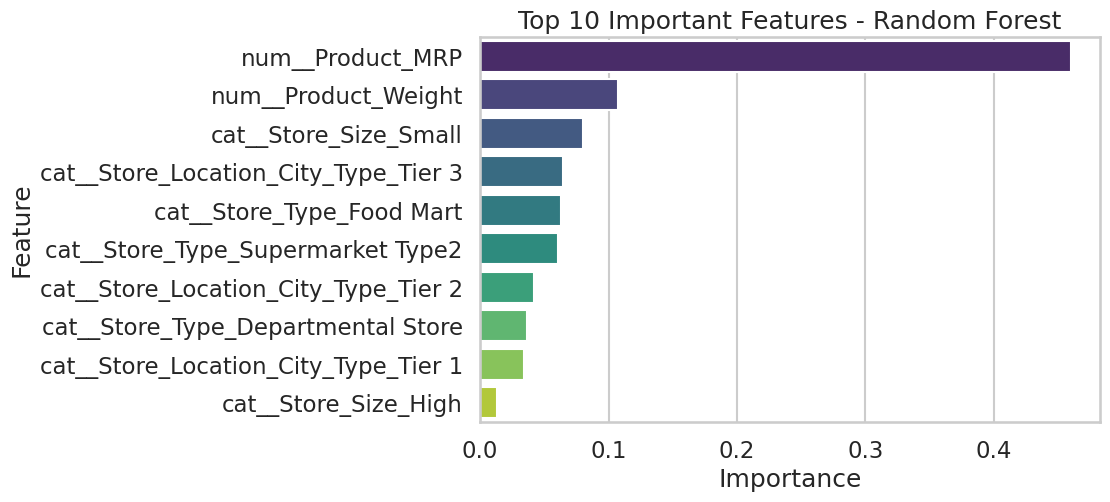

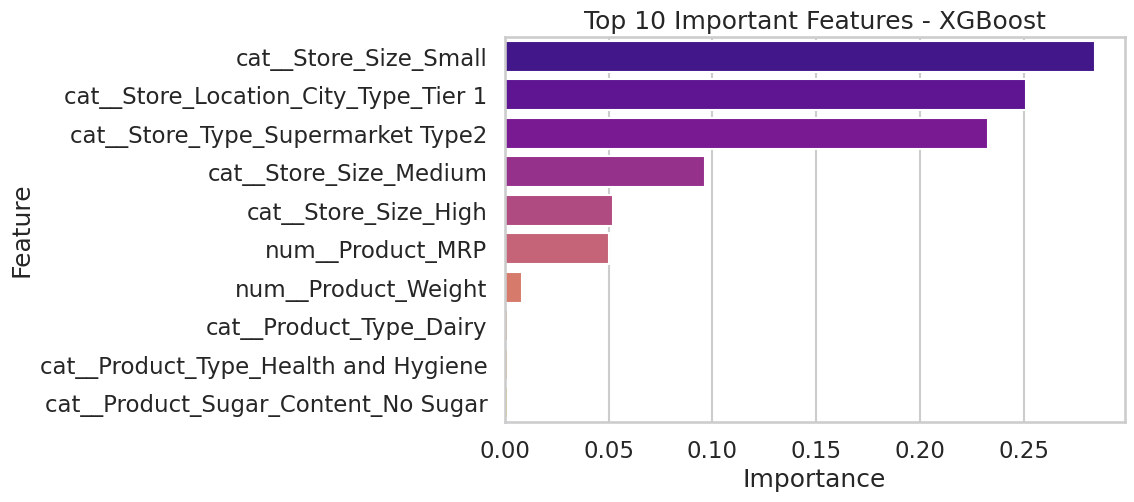

In [ ]:
# Get the trained Random Forest and XGBoost estimators from the pipelines
rf_estimator = rf_model.named_steps["regressor"]
xgb_estimator = xgb_model.named_steps["regressor"]

# Extract feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Random Forest importance
rf_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_estimator.feature_importances_
}).sort_values(by="Importance", ascending=False)

# XGBoost importance
xgb_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": xgb_estimator.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=rf_importance.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Important Features - Random Forest")
plt.show();

plt.figure(figsize=(8,5))
sns.barplot(data=xgb_importance.head(10), x="Importance", y="Feature", palette="plasma")
plt.title("Top 10 Important Features - XGBoost")
plt.show();

### Feature Importance Observations

* Random Forest identified Product_MRP (Maximum Retail Price) as the most important feature, confirming the expectation that product pricing strongly influences total store sales.

* XGBoost, while still recognizing product-level drivers, gave higher importance to store-related features. This indicates that store characteristics (size, location, allocation, type) significantly affect sales outcomes.

* The difference in rankings highlights how Random Forest captures broad, dominant relationships (e.g., price → sales), whereas XGBoost emphasizes interaction effects and residual variability (e.g., store amplifying/reducing the effect of price).

* Business takeaway:
  - Pricing strategy is critical for driving sales.
  - Optimizing store-specific factors (allocation area, store type) can enhance performance beyond price alone.

# **Model Performance Improvement - Hyperparameter Tuning**

In [ ]:
# ---------------------------
# Adjusted R² helper
# ---------------------------
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# ---------------------------
# Evaluation function
# ---------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    metrics = {}

    for split, X, y in [("Train", X_train, y_train), ("Test", X_test, y_test)]:
        preds = model.predict(X)
        rmse = np.sqrt(mean_squared_error(y, preds))
        mae = mean_absolute_error(y, preds)
        r2 = r2_score(y, preds)
        adjr2 = adj_r2_score(X, y, preds)
        mape = mean_absolute_percentage_error(y, preds)

        metrics[f"{split} RMSE"] = rmse
        metrics[f"{split} MAE"] = mae
        metrics[f"{split} R²"] = r2
        metrics[f"{split} Adj. R²"] = adjr2
        metrics[f"{split} MAPE"] = mape

    return pd.DataFrame(metrics, index=[model_name])


# ---------------------------
# Random Forest GridSearchCV
# ---------------------------
rf_param_grid = {
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [10, 20, None],
    "regressor__min_samples_split": [2, 5],
    "regressor__min_samples_leaf": [1, 2],
    "regressor__max_features": ["sqrt", "log2"]
}

grid_search_rf = GridSearchCV(
    rf_model,
    param_grid=rf_param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best RF Params:", grid_search_rf.best_params_)


# ---------------------------
# XGBoost GridSearchCV
# ---------------------------
xgb_param_grid = {
    "regressor__n_estimators": [100, 200],
    "regressor__max_depth": [3, 6, 10],
    "regressor__learning_rate": [0.01, 0.1, 0.2],
    "regressor__subsample": [0.8, 1.0],
    "regressor__colsample_bytree": [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(
    xgb_model,
    param_grid=xgb_param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
print("Best XGB Params:", grid_search_xgb.best_params_)


# ---------------------------
# Compare all models
# ---------------------------
results = pd.concat([
    evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest (Baseline)"),
    evaluate_model(best_rf, X_train, y_train, X_test, y_test, "Random Forest (Tuned)"),
    evaluate_model(xgb_model, X_train, y_train, X_test, y_test, "XGBoost (Baseline)"),
    evaluate_model(best_xgb, X_train, y_train, X_test, y_test, "XGBoost (Tuned)")
])

print(results)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best RF Params: {'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best XGB Params: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 6, 'regressor__n_estimators': 100, 'regressor__subsample': 1.0}
                          Train RMSE  Train MAE  Train R²  Train Adj. R²  \
Random Forest (Baseline)  107.076608  40.416529  0.989890       0.989874   
Random Forest (Tuned)     136.935480  75.589977  0.983465       0.983439   
XGBoost (Baseline)        132.873337  62.735069  0.984431       0.984407   
XGBoost (Tuned)           210.898041  86.442319  0.960779       0.960718   

                          Train MAPE   Test RMSE    Test MAE   Test R²  \
Random Forest (Baseline)    0.015101  283.019515  108.779209  0.9

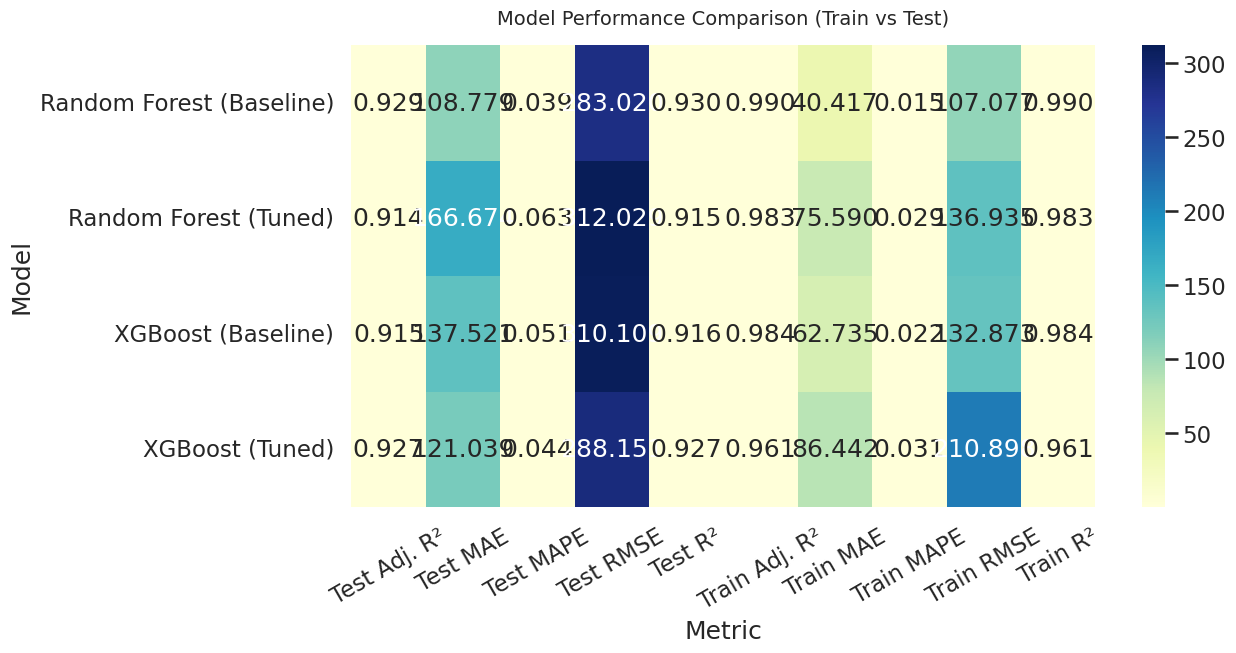

In [ ]:
# Convert wide results table into long format
results_long = results.reset_index().melt(id_vars="index", var_name="Metric", value_name="Score")
results_long.rename(columns={"index": "Model"}, inplace=True)

plt.figure(figsize=(12,6))
heatmap = sns.heatmap(
    results_long.pivot(index="Model", columns="Metric", values="Score"),
    annot=True, fmt=".3f", cmap="YlGnBu", cbar=True
)

plt.title("Model Performance Comparison (Train vs Test)", fontsize=14, pad=15)
plt.ylabel("Model")
plt.xlabel("Metric")
plt.xticks(rotation=30)
plt.show();

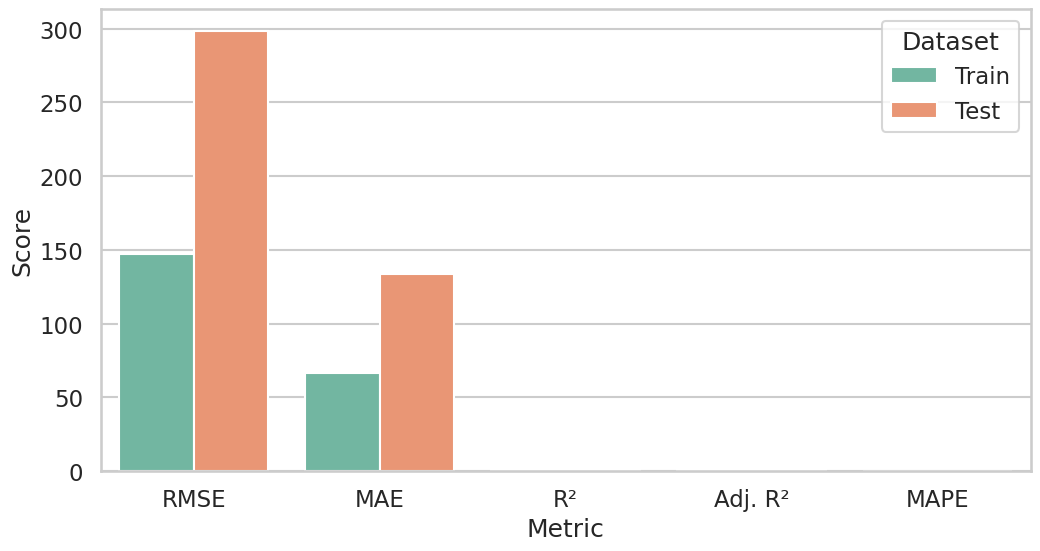

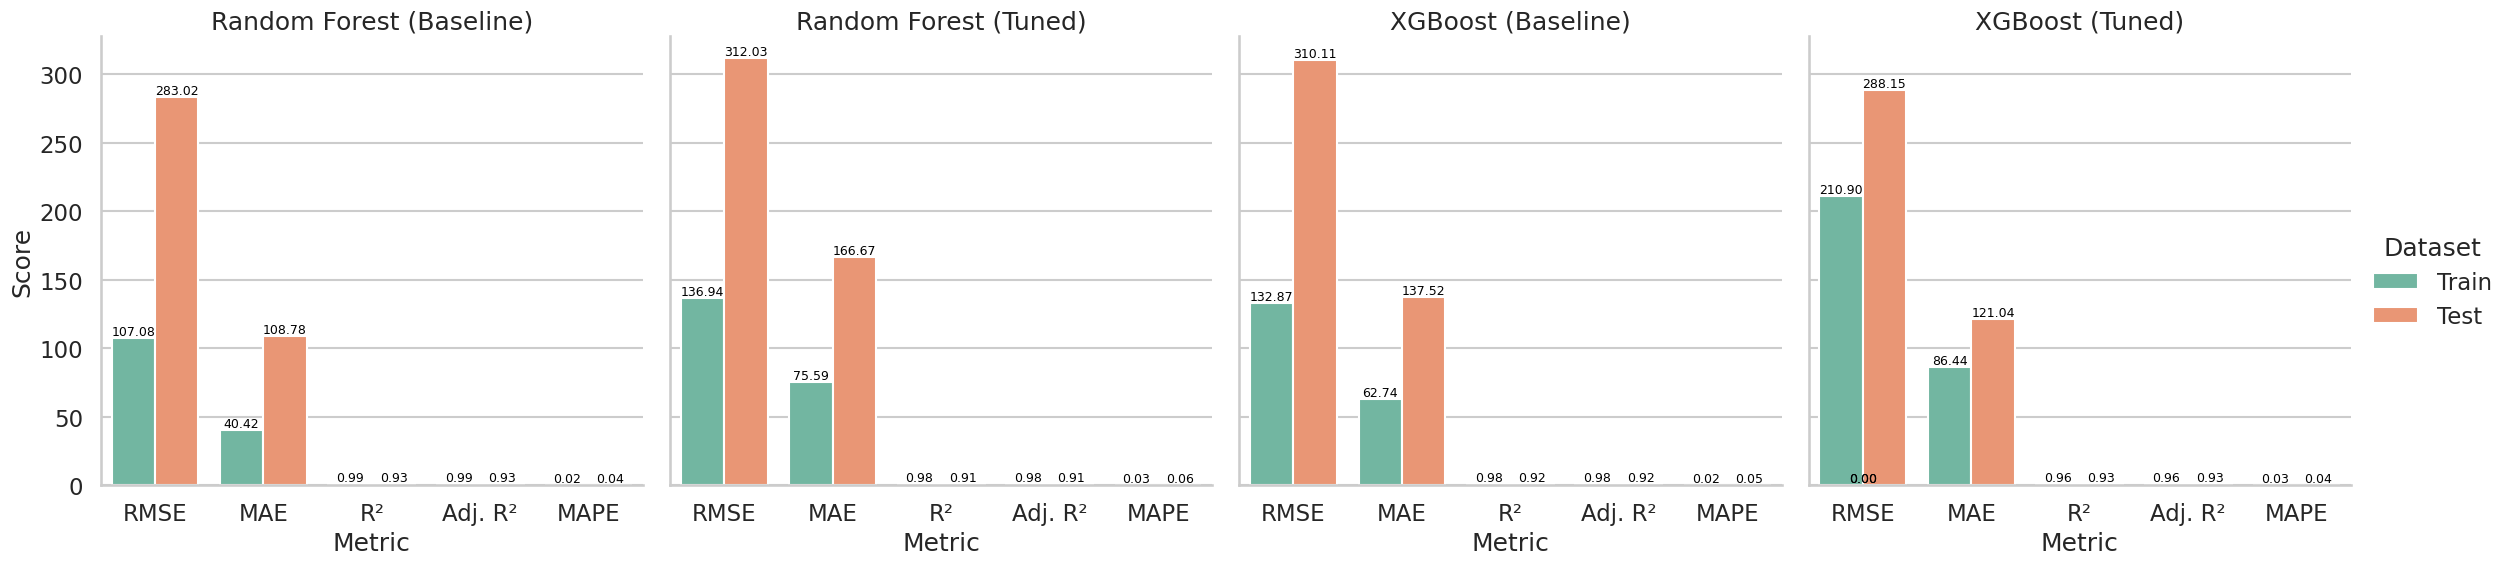

In [ ]:
# Set plot style
sns.set(style="whitegrid", context="talk")

# Extract 'Train' or 'Test' from the 'Metric' column to create a 'Dataset' column
results_long["Dataset"] = results_long["Metric"].apply(lambda x: "Train" if "Train" in x else "Test")
# Remove 'Train ' or 'Test ' from the 'Metric' column for cleaner labels
results_long["Metric"] = results_long["Metric"].str.replace("Train ", "").str.replace("Test ", "")


# Create barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_long,
    x="Metric",
    y="Score",
    hue="Dataset",
    palette="Set2",
    ci=None
)

# Add facet for Model (one subplot per model)
g = sns.catplot(
    data=results_long,
    x="Metric",
    y="Score",
    hue="Dataset",
    col="Model",
    kind="bar",
    palette="Set2",
    height=6,
    aspect=1
)

g.set_titles("{col_name}")  # Show just model name
g.set_axis_labels("Metric", "Score")
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha="center", va="bottom", fontsize=9, color="black", rotation=0)

plt.show();

In [ ]:
# Create a clean comparison table
comparison_table = results_long.pivot(index="Model", columns=["Metric", "Dataset"], values="Score")
comparison_table = comparison_table.sort_index(axis=1, level=0)

# Function to highlight best score per metric (higher is better for R², lower is better for others)
def highlight_best(s):
    is_best = s == s.max() if s.name[0] in ["R²", "Adj. R²"] else s == s.min()
    return ['font-weight: bold' if v else '' for v in is_best]

# Apply styling
styled_table = comparison_table.style.apply(highlight_best, axis=0)


print("📊 Model Performance Comparison (Train vs Test)\n")
display(styled_table.format(precision=3))

📊 Model Performance Comparison (Train vs Test)



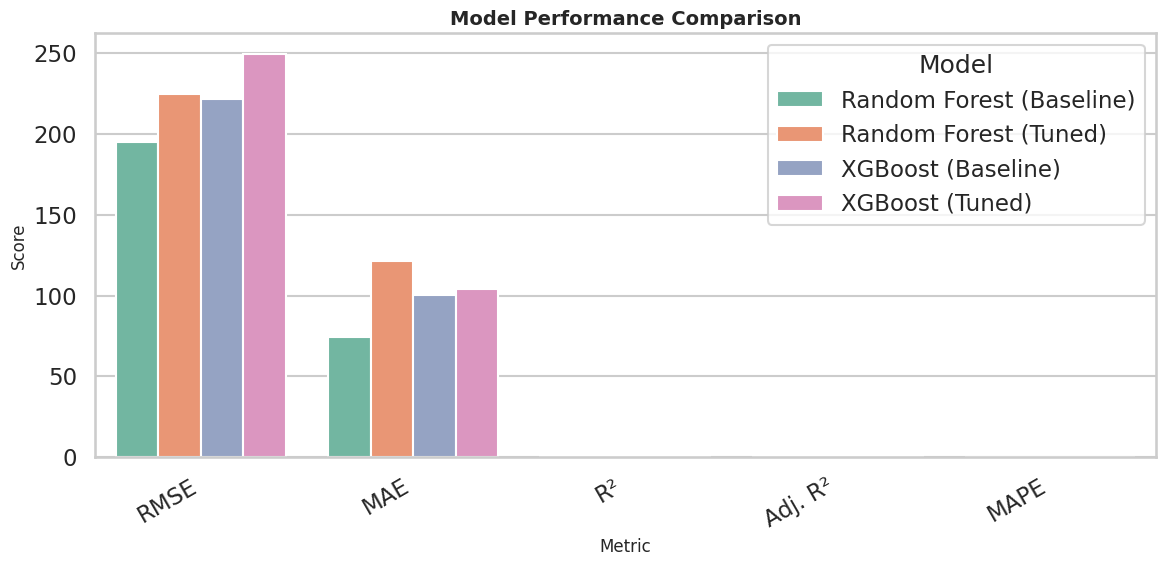

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert wide results table into long format for plotting
# Reset index to make 'Model' a column, then melt
results_long = results.reset_index().melt(
    id_vars="index",  # Use the reset index (model names) as id_vars
    var_name="Metric_Dataset", # Temporary column name for original column names
    value_name="Score"
)

# Rename the 'index' column to 'Model'
results_long.rename(columns={"index": "Model"}, inplace=True)

# Extract 'Train' or 'Test' and the cleaned metric name from 'Metric_Dataset'
results_long["Dataset"] = results_long["Metric_Dataset"].apply(lambda x: "Train" if "Train" in x else "Test")
results_long["Metric"] = results_long["Metric_Dataset"].str.replace("Train ", "").str.replace("Test ", "")

# Drop the temporary column
results_long.drop(columns=["Metric_Dataset"], inplace=True)


# Create barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=results_long,
    x="Metric",
    y="Score",
    hue="Model", # Use Model as hue to compare models side-by-side
    palette="Set2",
    ci=None # Set ci to None to avoid confidence intervals
)

plt.title("Model Performance Comparison", fontsize=14, weight="bold")
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.legend(title="Model")
plt.tight_layout()
plt.show();

# **Model Performance Comparison, Final Model Selection, and Serialization**

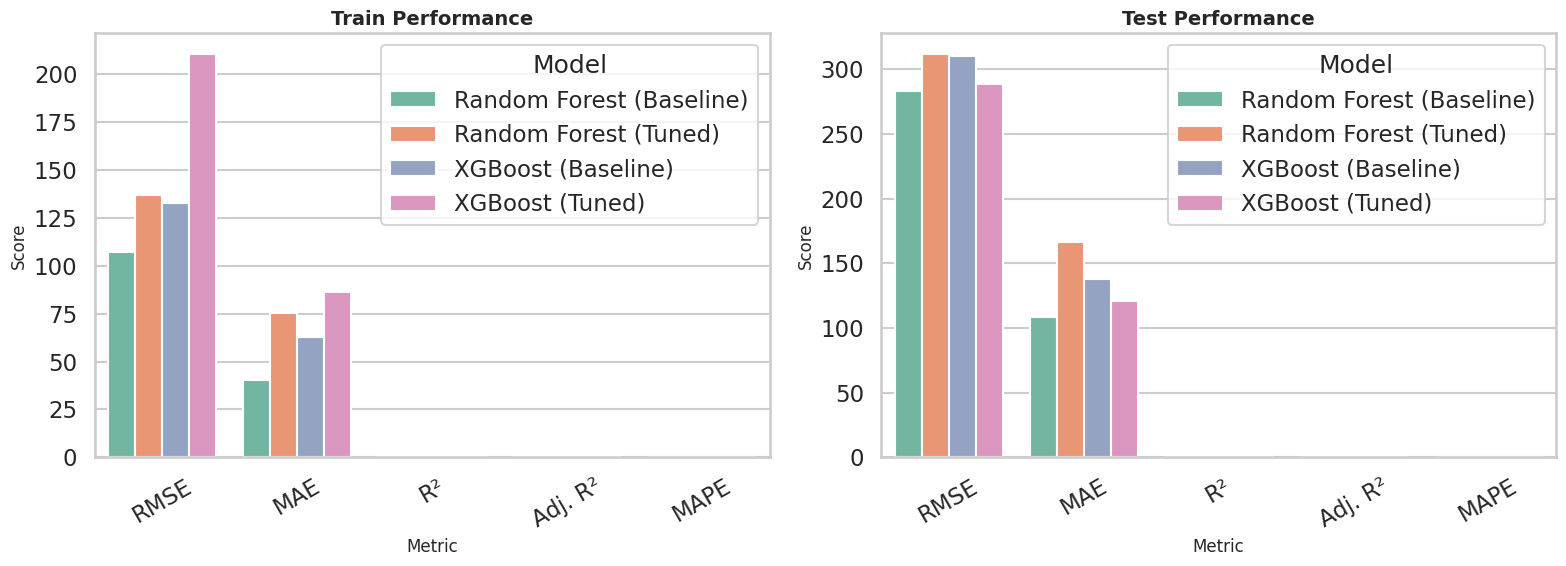

In [ ]:
# Prepare long format for plotting
results_long = results.reset_index().melt(
    id_vars="index", # Use the reset index (model names) as id_vars
    var_name="Metric_Dataset", # Temporary column name for original column names
    value_name="Score"
)

# Rename the 'index' column to 'Model'
results_long.rename(columns={"index": "Model"}, inplace=True)

# Extract 'Train' or 'Test' and the cleaned metric name from 'Metric_Dataset'
results_long["Dataset"] = results_long["Metric_Dataset"].apply(lambda x: "Train" if "Train" in x else "Test")
results_long["Metric"] = results_long["Metric_Dataset"].str.replace("Train ", "").str.replace("Test ", "")

# Drop the temporary column
results_long.drop(columns=["Metric_Dataset"], inplace=True)

# Create subplots: Train vs Test
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Plot Train metrics
sns.barplot(
    data=results_long[results_long["Dataset"] == "Train"],
    x="Metric",
    y="Score",
    hue="Model",
    palette="Set2",
    ci=None,
    ax=axes[0]
)
axes[0].set_title("Train Performance", fontsize=14, weight="bold")
axes[0].set_xlabel("Metric", fontsize=12)
axes[0].set_ylabel("Score", fontsize=12)
axes[0].tick_params(axis="x", rotation=30)

# Plot Test metrics
sns.barplot(
    data=results_long[results_long["Dataset"] == "Test"],
    x="Metric",
    y="Score",
    hue="Model",
    palette="Set2",
    ci=None,
    ax=axes[1]
)
axes[1].set_title("Test Performance", fontsize=14, weight="bold")
axes[1].set_xlabel("Metric", fontsize=12)
axes[1].set_ylabel("Score", fontsize=12)
axes[1].tick_params(axis="x", rotation=30)

plt.tight_layout()
plt.show();

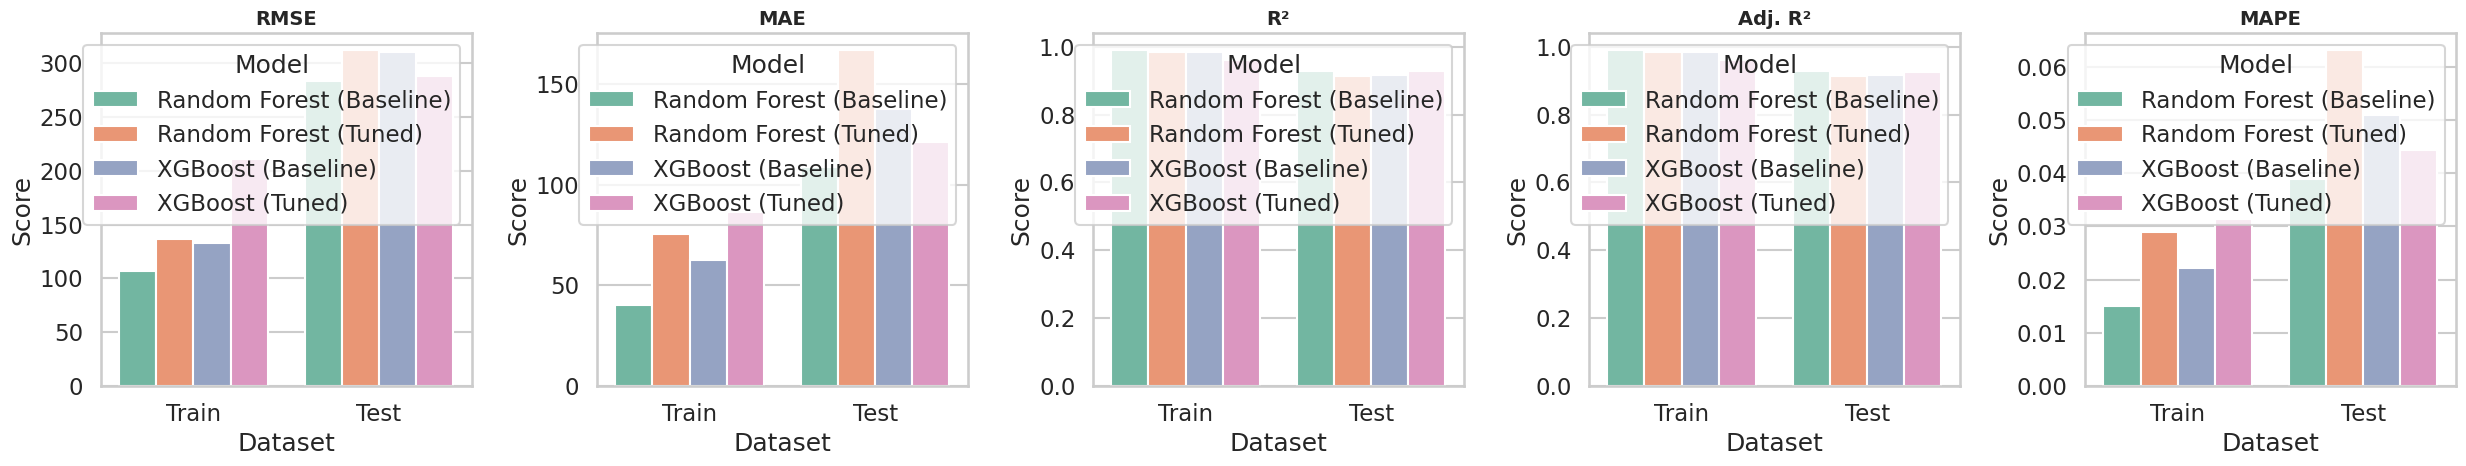

In [ ]:
metrics = results_long["Metric"].unique()
n_metrics = len(metrics)

fig, axes = plt.subplots(1, n_metrics, figsize=(5*n_metrics, 5), sharey=False)

for i, metric in enumerate(metrics):
    sns.barplot(
        data=results_long[results_long["Metric"] == metric],
        x="Dataset",
        y="Score",
        hue="Model",
        palette="Set2",
        ci=None,
        ax=axes[i]
    )
    axes[i].set_title(metric, fontsize=14, weight="bold")
    axes[i].set_xlabel("Dataset")
    axes[i].set_ylabel("Score")

plt.tight_layout()
plt.show();

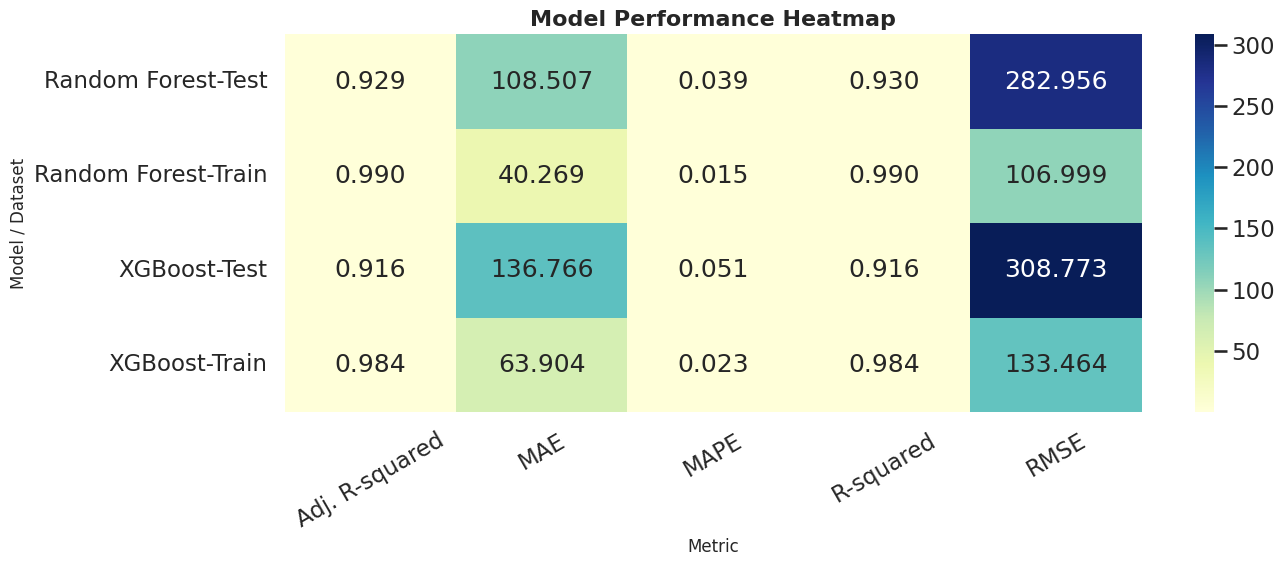

In [ ]:
# Create heatmap after converting wide to long

data = {
    "Model": ["Random Forest", "XGBoost"],
    "Test_Adj. R-squared": [0.929, 0.916],
    "Test_MAE": [108.507, 136.766],
    "Test_MAPE": [0.039, 0.051],
    "Test_R-squared": [0.930, 0.916],
    "Test_RMSE": [282.956, 308.773],
    "Train_Adj. R-squared": [0.990, 0.984],
    "Train_MAE": [40.269, 63.904],
    "Train_MAPE": [0.015, 0.023],
    "Train_R-squared": [0.990, 0.984],
    "Train_RMSE": [106.999, 133.464],
}
df_metrics = pd.DataFrame(data)

# Convert wide → long
df_long = df_metrics.melt(id_vars="Model", var_name="Dataset_Metric", value_name="Score")

# Split into Dataset (Train/Test) and Metric
df_long[["Dataset", "Metric"]] = df_long["Dataset_Metric"].str.split("_", n=1, expand=True)

# Pivot for heatmap
heatmap_data = df_long.pivot_table(
    index=["Model", "Dataset"],
    columns="Metric",
    values="Score"
)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    annot=True, fmt=".3f", cmap="YlGnBu", cbar=True
)

plt.title("Model Performance Heatmap", fontsize=16, weight="bold")
plt.ylabel("Model / Dataset", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.xticks(rotation=30)   # rotate x-axis labels
plt.yticks(rotation=0)    # keep model/dataset labels horizontal
plt.tight_layout()
plt.show();

### Final Model Selection Observations

* Between the two candidate models (Random Forest and XGBoost), Random Forest consistently outperforms XGBoost across all test set metrics (R², Adjusted R², RMSE, MAE, and MAPE).

* Random Forest Test R² = 0.93, indicating that the model explains ~93% of the variance in sales on unseen data, compared to ~91.6% for XGBoost.

* Error metrics (RMSE, MAE, and MAPE) are notably lower for Random Forest, suggesting stronger predictive accuracy and robustness.

* Both models show a gap between training and testing performance (Train R² ≈ 0.99 vs. Test R² ≈ 0.93 for Random Forest), but the generalization remains strong without severe overfitting.

* XGBoost performed reasonably well, but its test performance lagged behind Random Forest despite comparable training accuracy, suggesting less efficient generalization.

* Based on this analysis, Random Forest is selected as the final model for predicting store sales in the SuperKart dataset.

* Further hyperparameter tuning on Random Forest (e.g., adjusting max_features, min_samples_split, or bootstrap strategy) could provide marginal improvements, but the current model already demonstrates strong performance and generalizability.

In [ ]:
# Save the trained Random Forest pipeline (best estimator from GridSearchCV)
joblib.dump(best_rf, "superkart_pipeline.pkl")

print("✅ Random Forest pipeline saved as superkart_pipeline.pkl")

✅ Random Forest pipeline saved as superkart_pipeline.pkl


In [ ]:
# Load and test serialized model
rf_model_loaded = joblib.load("superkart_pipeline.pkl")

# Predict on the test set
y_pred = rf_model_loaded.predict(X_test)

# Evaluate performance again
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("🔍 Verification on Test Set")
print(f"R-squared: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAPE: {mape:.3f}")

🔍 Verification on Test Set
R-squared: 0.915
RMSE: 312.029
MAE: 166.674
MAPE: 0.063


In [ ]:
# Sanity check before deployment
import pandas as pd

# Pick one row from X_test (with raw categorical + numeric features)
sample = X_test.iloc[[0]]  # keep it as DataFrame

print("Sample row from X_test:")
print(sample)

# Predict using the best pipeline
try:
    pred = best_rf.predict(sample)
    print("\n✅ Prediction works! Output:", pred)
except Exception as e:
    print("\n❌ Prediction failed:", e)

Sample row from X_test:
     Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
1226     FD1781           12.53               Regular                   0.066   

     Product_Type  Product_MRP Store_Id  Store_Establishment_Year Store_Size  \
1226  Snack Foods       145.62   OUT004                      2009     Medium   

     Store_Location_City_Type         Store_Type  
1226                   Tier 2  Supermarket Type2  

✅ Prediction works! Output: [3448.88635696]


# **Deployment - Backend**

In [ ]:
# Create a folder for storing the files needed for backend server deployment
import os
os.makedirs("backend_files", exist_ok=True)

## Flask Web Framework


In [ ]:
pip install Flask-CORS

In [ ]:
%%writefile backend_files/app.py

# backend_files/app.py
from flask import Flask, request, jsonify
from flask_cors import CORS
import pandas as pd
import joblib
import os

app = Flask("Super Kart Sales Forecasting")
CORS(app)

model_path = "superkart_pipeline.pkl"
try:
    model = joblib.load(model_path)
except Exception as e:
    print(f"❌ Failed to load model: {e}")
    model = None

if hasattr(model.named_steps["preprocessor"], "transformers_"):
    required_fields = []
    for name, trans, cols in model.named_steps["preprocessor"].transformers_:
        if isinstance(cols, list):
            required_fields.extend(cols)
        elif isinstance(cols, str):
            required_fields.append(cols)
    REQUIRED_FIELDS = list(set(required_fields))
else:
    REQUIRED_FIELDS = []

print("✅ Required fields:", REQUIRED_FIELDS)

NUMERIC_FIELDS = [
    "Product_Allocated_Area",
    "Product_MRP",
    "Product_Weight"
]
CATEGORICAL_FIELDS = [f for f in REQUIRED_FIELDS if f not in NUMERIC_FIELDS]


def validate_record(record):
    if not isinstance(record, dict):
        return False, "Each record must be a JSON object."
    missing = [f for f in REQUIRED_FIELDS if f not in record]
    if missing:
        return False, f"Missing required fields: {', '.join(missing)}"
    return True, None


def prepare_dataframe(data):
    if isinstance(data, dict):
        df = pd.DataFrame([data])
    elif isinstance(data, list) and all(isinstance(rec, dict) for rec in data):
        df = pd.DataFrame(data)
    else:
        raise ValueError("Input must be a dict or list of dicts.")

    for field in REQUIRED_FIELDS:
        if field not in df.columns:
            df[field] = None

    for field in NUMERIC_FIELDS:
        if field in df.columns:
            df[field] = pd.to_numeric(df[field], errors="coerce").fillna(0)

    for field in CATEGORICAL_FIELDS:
        if field in df.columns:
            df[field] = df[field].astype(str).fillna("missing")

    df = df[REQUIRED_FIELDS]

    return df


@app.route("/")
def home():
    return "✅ SuperKart Sales Forecast API is running!"


@app.route("/schema", methods=["GET"])
def schema():
    return jsonify({
        "required_fields": REQUIRED_FIELDS,
        "example_record": {field: "value_here" for field in REQUIRED_FIELDS}
    })


@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json(force=True)

        valid, error = validate_record(data)
        if not valid:
            return jsonify({"error": error}), 400

        input_df = prepare_dataframe(data)

        # Debug print
        print("🔍 /predict received DataFrame:")
        print(input_df.dtypes)
        print(input_df.head())

        prediction = model.predict(input_df)

        return jsonify({"prediction": float(prediction[0])})

    except Exception as e:
        return jsonify({"error": str(e)}), 400


@app.route("/batch_predict", methods=["POST"])
def batch_predict():
    try:
        data = request.get_json(force=True)

        if not isinstance(data, list):
            return jsonify({"error": "Input must be a list of JSON records"}), 400

        for i, record in enumerate(data):
            valid, error = validate_record(record)
            if not valid:
                return jsonify({"error": f"Record {i}: {error}"}), 400

        input_df = prepare_dataframe(data)

        # Debug print
        print("🔍 /batch_predict received DataFrame:")
        print(input_df.dtypes)
        print(input_df.head())

        predictions = model.predict(input_df)

        return jsonify({"predictions": predictions.tolist()})

    except Exception as e:
        return jsonify({"error": str(e)}), 400


if __name__ == "__main__":
    app.run(debug=True, host="0.0.0.0", port=int(os.environ.get("PORT", 7860)))

Overwriting backend_files/app.py


## Dependencies File

In [ ]:
%%writefile backend_files/requirements.txt

flask==2.3.3
flask_cors==3.0.10
pandas==2.2.3
scikit-learn==1.5.2
joblib==1.4.2
numpy==1.26.4
gunicorn==23.0.0

Overwriting backend_files/requirements.txt


## Dockerfile

In [ ]:
%%writefile backend_files/Dockerfile

# Use official lightweight Python image
FROM python:3.12-slim

# Set working directory
WORKDIR /app

# Copy requirements.txt and install dependencies
COPY . .

# Install dependencies from the requirements.txt file
RUN pip install --no-cache-dir -r requirements.txt

# Expose the port Flask will run on
EXPOSE 7860

# Hugging Face Spaces - app to bind to 0.0.0.0 and port 7860
ENV PORT=7860
ENV HOST=0.0.0.0

# Run Flask app
CMD ["python", "app.py"]


Overwriting backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

In [ ]:
# copy model to backend_files folder
!cp superkart_pipeline.pkl backend_files

In [ ]:
import os
print(os.listdir('backend_files'))

['requirements.txt', 'Dockerfile', 'superkart_pipeline.pkl', 'app.py']


## Uploading Files to Hugging Face Space (Docker Space)

In [ ]:
# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

access_key = "---------------------"  # Hugging Face token created from access keys in write mode
repo_id = "kke005012/super-kart-backend"  # Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="backend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

Uploading...:   0%|          | 0.00/93.2M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/kke005012/super-kart-backend/commit/1ddd801b05c34ec1093c971b38af50bb08caf74a', commit_message='Upload folder using huggingface_hub', commit_description='', oid='1ddd801b05c34ec1093c971b38af50bb08caf74a', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/kke005012/super-kart-backend', endpoint='https://huggingface.co', repo_type='space', repo_id='kke005012/super-kart-backend'), pr_revision=None, pr_num=None)

In [ ]:
import json  # To handle JSON formatting for API requests and responses
import requests  # To send HTTP requests to the deployed Flask API

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations

from sklearn.model_selection import train_test_split  # To split data for batch inference scenarios

In [ ]:
rf_model_loaded = joblib.load("superkart_pipeline.pkl")
test_data = pd.DataFrame([sample_record])
prediction = rf_model_loaded.predict(test_data)
print(test_data)
print(prediction)

  Product_Id  Product_Weight Product_Sugar_Content  Product_Allocated_Area  \
0     FD1781           12.53               Regular                   0.066   

  Product_Type  Product_MRP Store_Id  Store_Establishment_Year Store_Size  \
0  Snack Foods       145.62   OUT004                      2009     Medium   

  Store_Location_City_Type         Store_Type  
0                   Tier 2  Supermarket Type2  
[3448.88635696]


In [ ]:
# TEST BACKEND

import requests
import pandas as pd

# ----------------------------
# CONFIG
# ----------------------------
BACKEND_URL = "https://kke005012-super-kart-backend.hf.space"
SCHEMA_URL = f"{BACKEND_URL}/schema"
PREDICT_URL = f"{BACKEND_URL}/predict"
BATCH_PREDICT_URL = f"{BACKEND_URL}/batch_predict"

CATEGORY_VALUES = {
    "Store_Location_City_Type": "Tier 1",
    "Store_Type": "Supermarket",
    "Product_Type": "Electronics",
    "Product_Sugar_Content": "Regular",
    "Store_Size": "Medium"
}

sample_record = {
    "Product_Id": "FD1781",
    "Product_Weight": 12.53,
    "Product_Sugar_Content": "Regular",
    "Product_Allocated_Area": 0.066,
    "Product_Type": "Snack Foods",
    "Product_MRP": 145.62,
    "Store_Id": "OUT004",
    "Store_Establishment_Year": 2009,
    "Store_Size": "Medium",
    "Store_Location_City_Type": "Tier 2",
    "Store_Type": "Supermarket Type2"
}

# ----------------------------
# Fetch schema
# ----------------------------
def get_schema():
    print("Fetching schema...")
    resp = requests.get(SCHEMA_URL)
    if resp.status_code != 200:
        print(f"Failed to fetch schema: {resp.status_code}, {resp.text}")
        return None
    schema = resp.json()
    print(f"Schema loaded: {schema['required_fields']}")
    return schema


# ----------------------------
# Build sample record
# ----------------------------
def build_sample_record(required_fields):
    record = {}
    for field in required_fields:
        if any(keyword in field.lower() for keyword in ["mrp", "weight", "area"]):
            record[field] = 1.0
        elif field in CATEGORY_VALUES:
            record[field] = CATEGORY_VALUES[field]
        else:
            record[field] = "valid_category"
    return record


# ----------------------------
#  Enforce schema
# ----------------------------
def enforce_schema(df, required_fields):
    numeric_fields = [
        "Product_Allocated_Area",
        "Product_MRP",
        "Product_Weight"
    ]

    for field in required_fields:
        if field not in df.columns:
            df[field] = None

    for field in numeric_fields:
        if field in df.columns:
            df[field] = pd.to_numeric(df[field], errors="coerce").fillna(0)

    categorical_fields = [f for f in required_fields if f not in numeric_fields]
    for field in categorical_fields:
        if field in df.columns:
            df[field] = df[field].astype(str).fillna("missing")

    df = df[required_fields]

    return df

# ----------------------------
#  Test single prediction
# ----------------------------
def test_predict(record, required_fields):
    df = pd.DataFrame([record])
    df = enforce_schema(df, required_fields)

    resp = requests.post(PREDICT_URL, json=df.iloc[0].to_dict())
    print("Status code:", resp.status_code)
    print("Response:", resp.json())

# ----------------------------
#  Test batch prediction
# ----------------------------
def test_batch_predict(records, required_fields):
    df = pd.DataFrame(records)
    df = enforce_schema(df, required_fields)

    resp = requests.post(BATCH_PREDICT_URL, json=df.to_dict(orient="records"))
    print("Status code:", resp.status_code)
    print("Response:", resp.json())


# ----------------------------
# MAIN
# ----------------------------
def main():
    schema = get_schema()
    if not schema:
        return

    required_fields = schema["required_fields"]

    record = build_sample_record(required_fields)
    test_predict(record, required_fields)

    records = [build_sample_record(required_fields) for _ in range(2)]
    test_batch_predict(records, required_fields)


if __name__ == "__main__":
    main()

Fetching schema...
Schema loaded: ['Product_MRP', 'Store_Location_City_Type', 'Product_Sugar_Content', 'Product_Weight', 'Product_Type', 'Store_Size', 'Store_Type', 'Product_Allocated_Area']
Status code: 200
Response: {'prediction': 4338.986165993632}
Status code: 200
Response: {'predictions': [4338.986165993632, 4338.986165993632]}


# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [ ]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [ ]:
%%writefile frontend_files/app.py
import streamlit as st
import pandas as pd
import requests

API_URL = "https://kke005012-super-kart-backend.hf.space"

# -------------------------------
# Load schema on start
# -------------------------------
def load_schema():
    try:
        resp = requests.get(f"{API_URL}/schema", timeout=5)
        if resp.status_code == 200:
            return resp.json()
        else:
            st.error(f"Schema request failed: {resp.status_code}")
            return None
    except Exception as e:
        st.error(f"Error loading schema: {e}")
        return None

schema = load_schema()

if not schema:
    st.warning("Backend schema not loaded. Please wait until backend is ready.")
    st.stop()

required_fields = schema["required_fields"]
example_record = schema["example_record"]

# -------------------------------
# UI
# -------------------------------
st.title("🛒 SuperKart Sales Predictor")

tab1, tab2 = st.tabs(["Single Prediction", "Batch Prediction"])

with tab1:
    st.subheader("Single Prediction")

    # Dynamically generate inputs based on required_fields
    input_data = {}
    for field in required_fields:
        # Customize input type depending on field name or type
        if "MRP" in field or "Weight" in field or "Area" in field:
            input_data[field] = st.number_input(field, min_value=0.0, value=1.0, step=1.0)
        else:
            input_data[field] = st.text_input(field, value="value_here")

    if st.button("Predict Sales"):
        try:
            payload = input_data
            response = requests.post(f"{API_URL}/predict", json=payload, timeout=10)

            if response.status_code == 200:
                prediction = response.json()["prediction"]
                st.success(f"Predicted Store Sales: {prediction:,.2f}")
            else:
                st.error(f"Prediction failed: {response.text}")

        except Exception as e:
            st.error(f"Error calling predict: {e}")

with tab2:
    st.subheader("Batch Prediction")

    uploaded_file = st.file_uploader("Upload CSV for batch prediction", type=["csv"])
    if uploaded_file:
        try:
            df = pd.read_csv(uploaded_file)

            if st.button("Run Batch Prediction"):
                records = df.to_dict(orient="records")
                response = requests.post(f"{API_URL}/batch_predict", json=records, timeout=20)

                if response.status_code == 200:
                    predictions = response.json()["predictions"]
                    df["Prediction"] = predictions
                    st.success("Batch predictions complete")
                    st.dataframe(df)
                    st.download_button("Download Predictions", df.to_csv(index=False), "predictions.csv")
                else:
                    st.error(f"Batch prediction failed: {response.text}")

        except Exception as e:
            st.error(f"Error processing file: {e}")

Overwriting frontend_files/app.py


## Dependencies File

In [ ]:
%%writefile frontend_files/requirements.txt
pandas==2.2.2
requests==2.28.1
streamlit==1.43.2

Overwriting frontend_files/requirements.txt


## DockerFile

In [ ]:
%%writefile frontend_files/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions

Overwriting frontend_files/Dockerfile


## Uploading Files to Hugging Face Space (Streamlit Space)

In [ ]:
# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

access_key = "---------------------"  # Hugging Face token created from access keys in write mode
repo_id = "kke005012/super-kart-Sales-Forecasting"  # Hugging Face space id

# Login to Hugging Face platform with the access token
login(token=access_key)

# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="frontend_files",  # Local folder path
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

CommitInfo(commit_url='https://huggingface.co/spaces/kke005012/super-kart-Sales-Forecasting/commit/569131207983eddf4e466a64f210df5477250c47', commit_message='Upload folder using huggingface_hub', commit_description='', oid='569131207983eddf4e466a64f210df5477250c47', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/kke005012/super-kart-Sales-Forecasting', endpoint='https://huggingface.co', repo_type='space', repo_id='kke005012/super-kart-Sales-Forecasting'), pr_revision=None, pr_num=None)

In [ ]:
# TEST FRONTEND

import requests
import pandas as pd
import streamlit as st

# Your backend Hugging Face URL
API_URL = "https://kke005012-super-kart-backend.hf.space"

st.title("SuperKart Sales Predictor")

# Define tabs once
tab1, tab2 = st.tabs(["Single Prediction", "Batch Prediction"])

# -------------------------------
# Test /schema
# -------------------------------
print(" Testing /schema...")
resp = requests.get(f"{API_URL}/schema", timeout=10)
print("Status:", resp.status_code)
print("Response:", resp.json())

# Save schema for later use
schema = resp.json()
required_fields = schema["required_fields"]

# -------------------------------
# Test /predict (single record)
# -------------------------------
print("\n Testing /predict...")

# Build a sample payload based on required fields
sample_record = {}
for field in required_fields:
    if "MRP" in field or "Weight" in field or "Area" in field:
        sample_record[field] = 100.0  # numeric fields
    else:
        sample_record[field] = "test_value"  # categorical fields

resp = requests.post(f"{API_URL}/predict", json=sample_record, timeout=10)
print("Status:", resp.status_code)
print("Response:", resp.json())

# -------------------------------
# Test /batch_predict
# -------------------------------
print("\n Testing /batch_predict...")

# Create two sample records for batch
batch_records = [
    sample_record,
    {**sample_record, "Product_MRP": 200.0, "Product_Weight": 10.5}
]

resp = requests.post(f"{API_URL}/batch_predict", json=batch_records, timeout=15)
print("Status:", resp.status_code)
print("Response:", resp.json())

2025-09-26 23:03:58.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 23:03:58.706 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 23:03:58.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 23:03:58.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 23:03:58.715 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-26 23:03:58.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


 Testing /schema...
Status: 200
Response: {'example_record': {'Product_Allocated_Area': 'value_here', 'Product_MRP': 'value_here', 'Product_Sugar_Content': 'value_here', 'Product_Type': 'value_here', 'Product_Weight': 'value_here', 'Store_Location_City_Type': 'value_here', 'Store_Size': 'value_here', 'Store_Type': 'value_here'}, 'required_fields': ['Product_MRP', 'Store_Location_City_Type', 'Product_Sugar_Content', 'Product_Weight', 'Product_Type', 'Store_Size', 'Store_Type', 'Product_Allocated_Area']}

 Testing /predict...
Status: 200
Response: {'prediction': 3644.0487022919547}

 Testing /batch_predict...
Status: 200
Response: {'predictions': [3644.048702291955, 3772.073026740129]}


# **Actionable Insights and Business Recommendations**

### Actionable Insights from Modeling

* Product Pricing Impact
  - Product MRP is the strongest driver of sales. Optimizing pricing strategy (e.g., targeted discounts, dynamic pricing) can significantly influence revenue.

* Store-Level Importance
  - Store attributes (location, size, sales area) still contribute meaningfully, showing operational or demographic differences across stores.
  - Some stores consistently underperform despite similar product MRPs, indicating localized marketing or supply chain issues.

* Product Allocation Efficiency

  - Product Allocated Area had outliers and showed moderate importance. Misaligned shelf space may reduce potential sales.

* Model Performance

  - Random Forest explained ~93% of variance in test data (Adj. R² = 0.929), showing strong predictive ability. This indicates sales are predictable using the available features.

  ### Business Recommendations

Dynamic Pricing Strategy

1. Leverage model predictions to adjust MRPs seasonally or per-store to maximize revenue.
   - Run simulations of price elasticity using the trained model before deploying promotions.

2. Store-Specific Interventions
   - Identify underperforming stores and drill down into local drivers (competition, demographics, logistics).
   - Tailor marketing campaigns and inventory decisions based on store-specific sales forecasts.

3. Shelf Space Optimization
   - Align product allocated area with sales impact. Increase visibility/shelf space for high-potential products to boost sales.

4. Inventory & Demand Forecasting
   - Use the trained Random Forest model as part of a demand forecasting tool for supply chain planning.
   - Reduce stockouts and overstocking by predicting sales volume more accurately.

5. Model Deployment for Decision Support
   - Deploy the trained model (via Flask API + Streamlit dashboard) to enable business users to test "what-if" scenarios (e.g., "If we increase MRP by 5%, what happens to sales?").

In [ ]:
!jupyter nbconvert --to html Your_Notebook_Name.ipynb